## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
#get polling data and look at it.
poll = pd.read_csv('poll.csv')
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [5]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [6]:
#get counts for Brown v. Green 
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [7]:
# create def to make sampling distribution of polling data
def sample(brown,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [10]:
# one possible sample from def
s = sample(0.51,n=1000)
s.vote.value_counts(normalize=True)

Brown    0.508
Green    0.492
Name: vote, dtype: float64

In [11]:
# repeat the sampling many times to see simulated poll results
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])
dist.head()

,Brown,Green
vote,0.501,0.499
vote,0.478,0.522
vote,0.500,0.500
vote,0.539,0.461
vote,0.524,0.476


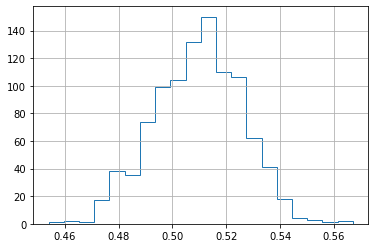

In [12]:
#create hist of all the sim results, Brown proportion can range from ~0.48-0.54
dist.Brown.hist(histtype='step',bins=20)

In [13]:
# increasing precision through confidence interval
def samplingdist(brown,n=1000):
    return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(1000)])

In [14]:
# look for 95% confidence interval
def quantiles(brown,n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [18]:
# explore a few values
# quantiles(0.50)
# quantiles(0.48)
quantiles(0.54) 
# 95% conf int between 0.48 and 0.54 OR point estimate of 0.51 +/- 0.03 error
# result of election lies within the margin of error.

(0.507, 0.573)

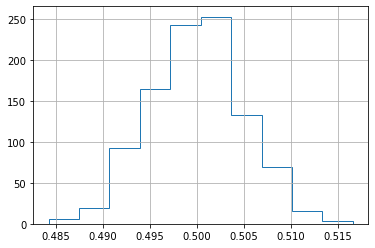

In [19]:
# improve prediction by increasing sample
dist = samplingdist(0.50,10000)
# visualize hist and margin of error = ~1% so Brown is likely winner
# margin of error improves by sqrt(n_sample)
dist.Brown.hist(histtype='step')

In [20]:
# use poll-larger to see prediction improvement with increased sampling
largepoll = pd.read_csv('poll-larger.csv')
# likely winner for this pop is Green
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64